In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r'M:\Data science career\DataScienceProject\DataSet\dataset.csv')

In [5]:
df

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,False,47,0.00000,0.00000,0.00000,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,False,19,0.00000,0.00000,0.00000,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,False,47,0.00000,0.00000,0.00000,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,False,48,0.00000,0.00000,0.00000,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [7]:
df['created'] = pd.to_datetime(df['created'])
df['published_time'] = pd.to_datetime(df['published_time'])


In [11]:
df.drop(['avg_rating',
         'avg_rating_recent',
         'discount_price__price_string',
         'price_detail__price_string',
         'discount_price__currency',
         'price_detail__currency',
         'url'],
            inplace=True,
            axis=1
    )

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            13608 non-null  int64              
 1   title                         13608 non-null  object             
 2   is_paid                       13608 non-null  bool               
 3   num_subscribers               13608 non-null  int64              
 4   rating                        13608 non-null  float64            
 5   num_reviews                   13608 non-null  int64              
 6   is_wishlisted                 13608 non-null  bool               
 7   num_published_lectures        13608 non-null  int64              
 8   num_published_practice_tests  13608 non-null  int64              
 9   created                       13608 non-null  datetime64[ns, UTC]
 10  published_time                1360

In [13]:
df['price_detail__amount'] = df['price_detail__amount'] * (1/82) 
df['discount_price__amount'] = df['discount_price__amount'] * (1/82)

In [14]:
df['Discount_Percentage'] = ((df['price_detail__amount'] - df['discount_price__amount']) / df['price_detail__amount'] ) *100 

df['Discount_Percentage'] = 100 - df['Discount_Percentage']

In [16]:
imputer = SimpleImputer(strategy= 'median')
columns_to_impute = ['discount_price__amount' , 'Discount_Percentage' , 'price_detail__amount']
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])


In [17]:
df['title'] = df['title'].str.lower()
df['title'] = df['title'].str.strip().replace(r'\s+',' ',regex=True)
df['title'] = df['title'].str.replace(r'[^\w\s]','',regex=True)


In [18]:
def categorize_title(title):
    title_lower = title.lower()
    if 'sql' in title_lower or 'mysql' in title_lower or 'database' in title_lower:
        return 'Database'
    elif 'tableau' in title_lower or 'power bi' in title_lower or 'data viz' in title_lower:
        return 'Data Visualization'
    elif 'excel' in title_lower or 'spreadsheet' in title_lower:
        return 'Spreadsheet'
    elif any(kw in title_lower for kw in ['agile', 'scrum', 'pmp', 'project management']):
        return 'Project Management'
    elif any(kw in title_lower for kw in ['financial', 'finance', 'accounting']):
        return 'Finance'
    elif 'mba' in title_lower or 'business' in title_lower or 'enterprise' in title_lower:
        return 'Business'
    elif any(kw in title_lower for kw in ['write', 'writing', 'editorial']):
        return 'Writing'
    elif 'sale' in title_lower or 'marketing' in title_lower:
        return 'Sales/Marketing'
    elif any(kw in title_lower for kw in ['data science', 'analytics', 'machine learning']):
        return 'Data Science'
    elif 'management' in title_lower:
        return 'Management'
    elif 'leadership' in title_lower:
        return 'Leadership'
    elif 'communication' in title_lower:
        return 'Communication'
    else:
        return 'Other'

df['category'] = df['title'].apply(categorize_title)

In [19]:
df['category'].value_counts()

category
Other                 8685
Business              1450
Finance               1119
Management             523
Sales/Marketing        516
Project Management     374
Spreadsheet            263
Writing                259
Data Visualization     129
Data Science            99
Leadership              74
Communication           71
Database                46
Name: count, dtype: int64

C:\Users\mahmod\AppData\Local\Temp\ipykernel_15532\1792057959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


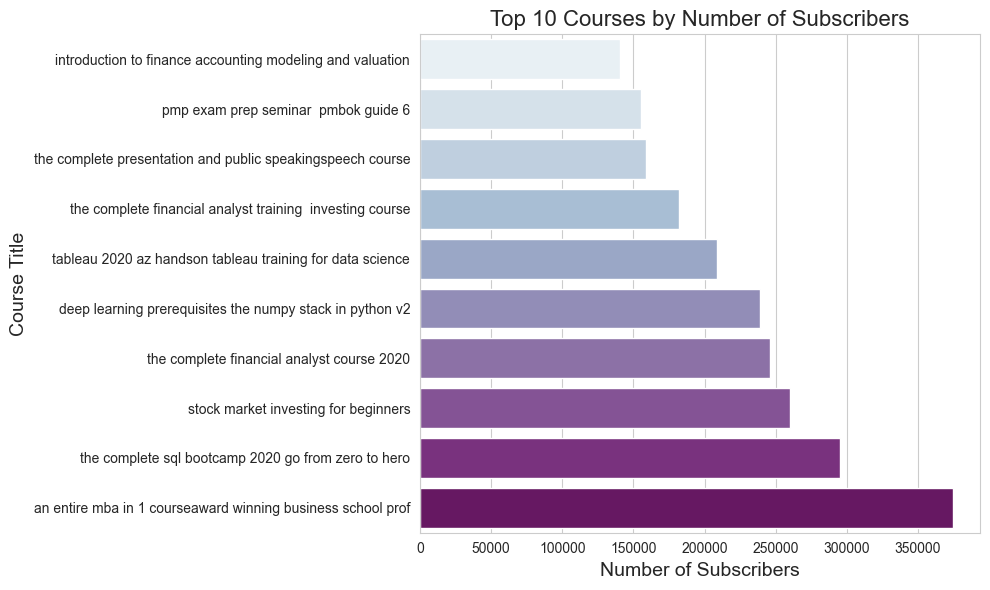

In [28]:
top_subscribers_desc = df.nlargest(10, 'num_subscribers').sort_values('num_subscribers', ascending=True)


sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    x="num_subscribers",
    y="title",
    data=top_subscribers_desc,
    palette="BuPu",  
    orient="h"
)


plt.title("Top 10 Courses by Number of Subscribers", fontsize=16)
plt.xlabel("Number of Subscribers", fontsize=14)
plt.ylabel("Course Title", fontsize=14)


plt.tight_layout()
plt.show()


C:\Users\mahmod\AppData\Local\Temp\ipykernel_15532\1443710944.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


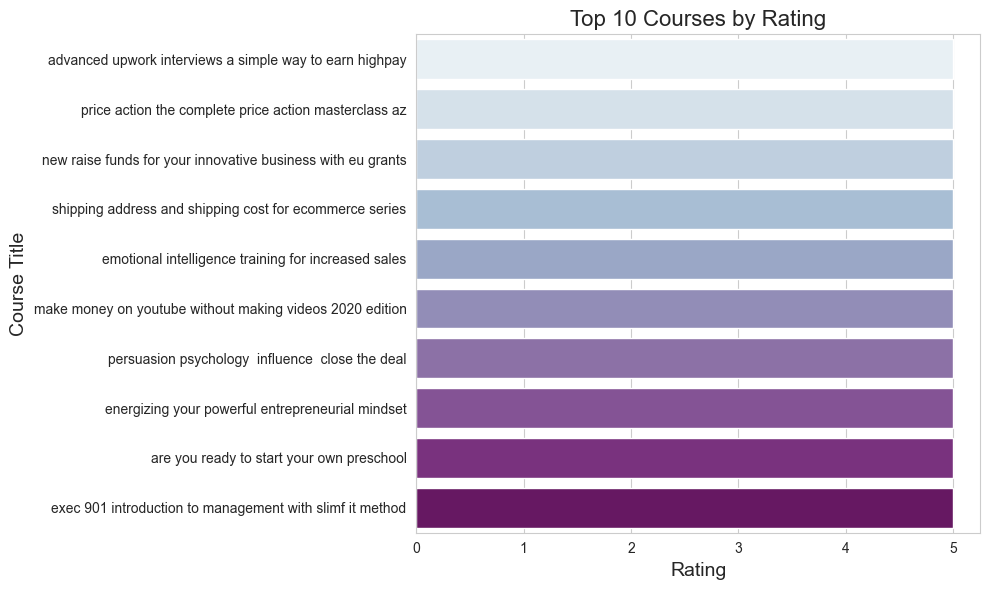

In [29]:

top_rated = df.nlargest(10, 'rating').sort_values('rating', ascending=True)


sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(
    x="rating",
    y="title",
    data=top_rated,
    palette="BuPu",  
    orient="h"
)


plt.title("Top 10 Courses by Rating", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Course Title", fontsize=14)


plt.tight_layout()
plt.show()


C:\Users\mahmod\AppData\Local\Temp\ipykernel_15532\3320287089.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


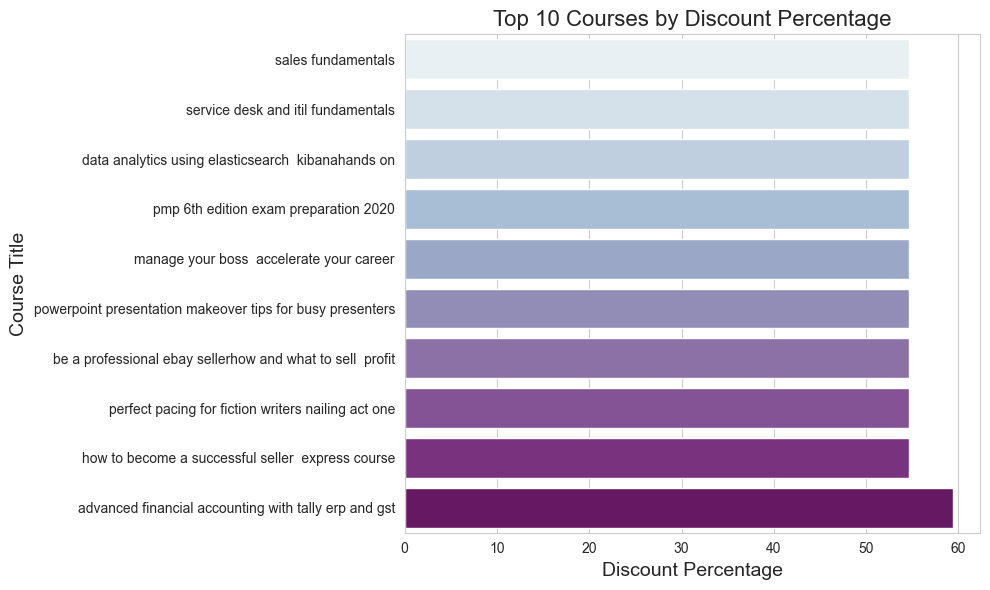

In [30]:
top_rated = df.nlargest(10, 'Discount_Percentage').sort_values('Discount_Percentage', ascending=True)


sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(
    x="Discount_Percentage",
    y="title",
    data=top_rated,
    palette="BuPu",  
    orient="h"
)


plt.title("Top 10 Courses by Discount Percentage", fontsize=16)
plt.xlabel("Discount Percentage", fontsize=14)
plt.ylabel("Course Title", fontsize=14)


plt.tight_layout()
plt.show()

C:\Users\mahmod\AppData\Local\Temp\ipykernel_15532\3361800770.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


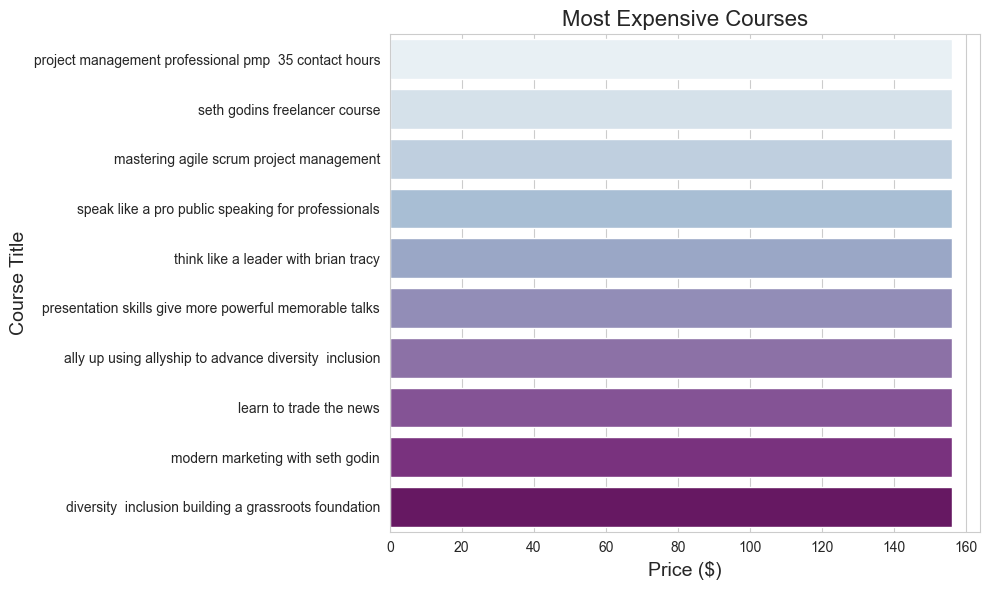

In [31]:
top_rated = df.nlargest(10, 'price_detail__amount').sort_values('price_detail__amount', ascending=True)


sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(
    x="price_detail__amount",
    y="title",
    data=top_rated,
    palette="BuPu",  
    orient="h"
)


plt.title("Most Expensive Courses", fontsize=16)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Course Title", fontsize=14)


plt.tight_layout()
plt.show()